**Introduction**

Air pollution is now one of the biggest environmental challenges faced by India. Over the years, Air quality varies significantly across Indian cities due to differences in climate, population, and urban activites. As a result, air quality often drops to unhealty levels, afftecting public health and overall quality of life.

To understand this issue better, the **India Air Quality dataset** provides daily pollution measurements collected from **26 cities between 2015 and 2020.** The dataset includes key **pollutants like PM2.5, PM10, No2, SO2, CO, O3** and several volatile organic compounds, along with the Air Quality Index that indicates how clean or polluted the air is.

By analysing this dataset, we can study how pollution levels change across cities, identify long-term trends, detect seasonal patterns, and compare different regions of the country. Also analyse that which pollutants contribute the most to poor air quality.

**Reason for Choosing this Dataset**

India air quality dataset was chosen because it contains long term, real world air pollution measurements across multiple pollutants and cities in India. Unlike short term or single pollutant datasets, this dataset captures variations in major air pollutants and volatile organic compounds over several years.

It is Suitable for Understanding:

long term pollution trends

studying seasonal and temporal variations

Comparing pollution levels across different regions and seasons

Air pollution is a persistent environmental and public health issue in India.

**Benefits of doing this analysis**

Performing this analysis provides several practical benefits:

**Public health preparedness**
Identifying high pollution season allows hospitals and health agencies to prepare for increased respiratory cases.

**Targeted pollution control**
Authorities can implement seasonal policies such as tracfic restrictions, industrial regulation, or construction bans during high risk periods.

**Urban and transport planning**
City planners can use insights to improve traffic flow, promote public transport, and reduce emissions in high pollution zones.

**Awareness and education**
Clear visualisation and summaries make pollution data understandable to the public, increasing awareness and bevioural change.

In [89]:
#Importing the Libraries


import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [90]:
! git config --global user.name "suma-br1786" # replace with your username that you used to create the Github account
! git config --global user.email "brsume1786@gmail.com" # and the email id which you have used to create account

In [91]:
username = "suma-br1786" #replace with your own user name
repo = "India-Air-Quality-Analysis-PRAC1"



In [92]:
! git clone https://{token}@github.com/{username}/{repo}

Cloning into 'India-Air-Quality-Analysis-PRAC1'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 121 (delta 59), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (121/121), 1.79 MiB | 4.27 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [93]:
%cd {repo}

/content/India-Air-Quality-Analysis-PRAC1/India-Air-Quality-Analysis-PRAC1/India-Air-Quality-Analysis-PRAC1


In [94]:
%ls #This list the files present in the path

 all_cities_combined.csv         data_overview.py    multiapp.py         run.py
'Assessment Data-20251028'/      eda.py              pre_processing.py
 cleaned_India_air_quality.csv   model_building.py   requirements.txt


**Understanding the general insight of the Data**

In [95]:
# Overview of combined csv files data
df = pd.read_csv('all_cities_combined.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Mumbai,01/01/2015,NaN,NaN,NaN,NaN,27.38,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
1,Mumbai,02/01/2015,NaN,NaN,NaN,NaN,26.20,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
2,Mumbai,03/01/2015,NaN,NaN,NaN,NaN,26.04,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
3,Mumbai,04/01/2015,NaN,NaN,NaN,NaN,25.97,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
4,Mumbai,05/01/2015,NaN,NaN,NaN,NaN,25.18,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


**First five row of the dataset**

In [96]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Mumbai,01/01/2015,NaN,NaN,NaN,NaN,27.38,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
1,Mumbai,02/01/2015,NaN,NaN,NaN,NaN,26.20,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
2,Mumbai,03/01/2015,NaN,NaN,NaN,NaN,26.04,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
3,Mumbai,04/01/2015,NaN,NaN,NaN,NaN,25.97,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
4,Mumbai,05/01/2015,NaN,NaN,NaN,NaN,25.18,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN


**Last five row of the dataset**

In [97]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/06/2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01/07/2020,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [98]:
#Checking the Total Number of rows and columns
df.shape
print(f'No of Rows: {df.shape[0]}, No of Columns: {df.shape[1]}')

No of Rows: 29531, No of Columns: 16


In [99]:
#Columns names
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

**Describing Columns information**

In [100]:
#All cities list
city_list = df['City'].unique().tolist()
print(f"Total cities: {len(city_list)}")
city_list

Total cities: 26


['Mumbai',
 'Lucknow',
 'Aizawl',
 'Chennai',
 'Chandigarh',
 'Shillong',
 'Gurugram',
 'Bengaluru',
 'Jorapokhar',
 'Hyderabad',
 'Talcher',
 'Guwahati',
 'Delhi',
 'Patna',
 'Brajrajnagar',
 'Bhopal',
 'Amaravati',
 'Amritsar',
 'Kolkata',
 'Ernakulam',
 'Coimbatore',
 'Ahmedabad',
 'Jaipur',
 'Kochi',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [101]:
#finding date and year range

df['Date'] =pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
start_date =df['Date'].min()
end_date = df['Date'].max()

print("Start date:", start_date)
print("End date:", end_date)

Start date: 2015-01-01 00:00:00
End date: 2020-07-01 00:00:00


**Column Names**

**PM2.5** - Particulate Matter(tiny or liquid particles present in the air) with
dimension of 2.5

**PM10** -  Particulate Matter(tiny or liquid particles present in the air) with
dimension of 10

**NO**- Nitric oxide

**NO2** - Nitrogen Dioxide

**NOx**- Nitrogen Oxides

**NH3** - Ammonia

**CO** - Carbon Monoxide

**SO2** - Sulfur Dioxide

**O3**- Ozone

**Benzene** - Volatile organic compound (chemical)

**Toluene** -  Volatile organic compound (chemical)

**Xylene** -  Volatile organic compound (chemical)

**AQI**- Air Quality Index

**AQI_Bucket** - Air Quality Category





**Insight**

The dataset contains a total of 29,531 rows and 17 columns, covering 26 unique cities over the years of 2015 to 2020. It includes measurements of air pollutants along with AQI values and AQI categories.

**Data Pre-Processing**

In [102]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

**Data type of each attribute**

In [103]:
df.dtypes

,0
City,object
Date,datetime64[ns]
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [104]:
# check any duplicated entries
print(f"There are  {df.duplicated().sum()} duplicates in the dataset")

There are  0 duplicates in the dataset


In [105]:
 #checking for missing values and its percentage

 def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_val_table = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table = mis_val_table.sort_values('% of Total Values', ascending=False)

    return mis_val_table

 missing_values = missing_values_table(df)
 display(missing_values.style.background_gradient(cmap='Greens'))

,Missing Values,% of Total Values
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


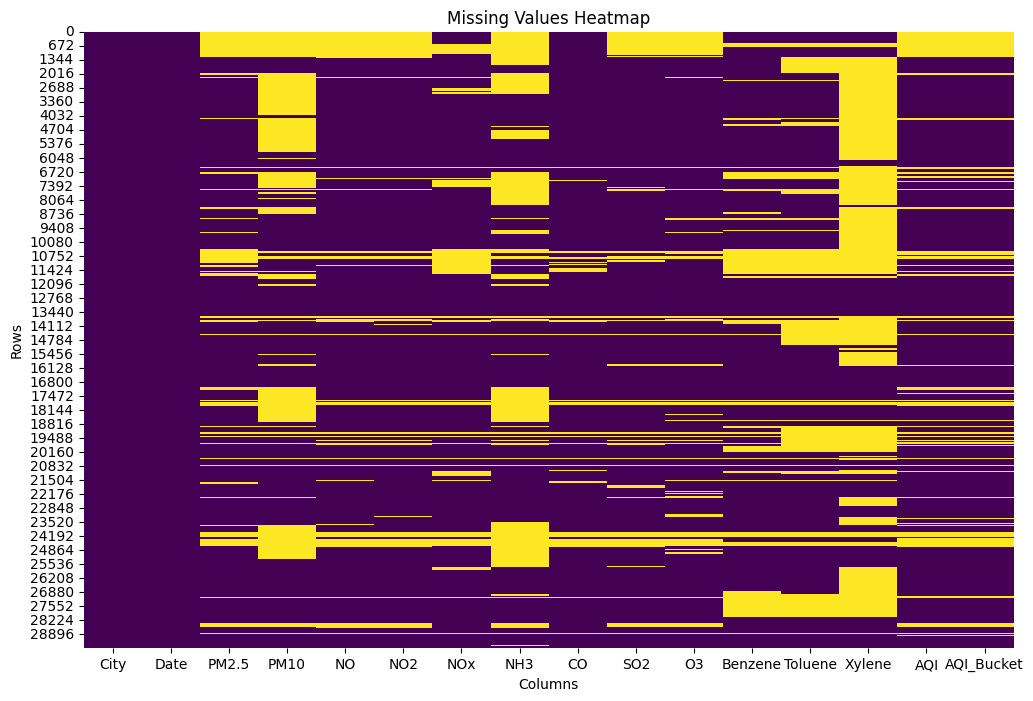

In [106]:
# Visualize the missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

**Filling Missing Values**

In [107]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

#sort by city and Date
df = df.sort_values(['City', 'Date']).copy()

#Filling numeric columns
Column_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']

df[Column_to_fill] = df[Column_to_fill].apply(pd.to_numeric, errors='coerce')

#forward fill city-wise
df[Column_to_fill] = df.groupby('City')[Column_to_fill].ffill()

#Backward fill city-wise
df[Column_to_fill] = df.groupby('City')[Column_to_fill].ffill()

#Backward fill city-wise
df[Column_to_fill] = df.groupby('City')[Column_to_fill].bfill()

#columns to fill with city wise median

#Fill categorical AQI_Bucket using Mode
df['AQI_Bucket'] = df.groupby('City')['AQI_Bucket'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

#Columns to fill with city-wise median
median_cols = ['PM10', 'NOx', 'NH3', 'O3', 'Benzene', 'Toluene', 'Xylene']

#fill missing values with city-wise median
for col in median_cols:
  df[col] = df.groupby('City')[col].transform(lambda x: x.fillna(x.median()))


#fill any remaining NaNs in median_cols with overall medain
for col in median_cols:
       df[col] = df[col].fillna(df[col].median())

#check remaining missing values
print(df[Column_to_fill].isna().sum())

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64


**Cleaned the dataset by fixing missing values.**

Note : Missing pollutants were filled separately because each one behaves differently and has different ranges Hence Time-based pollutants were filled using forward/backward fill (i.e **PM2.5, NO, NO2, C0, SO2**), pollutants with irregular patterns were filled using the city-wise median (i.e **PM10, NOx, NH3, O3, Benzene, Toluene, Xylene**) and categorial column **AQI** using the mode.

1. The Date column was converted to datetime format and the data was sorted by city and Date, so the filling happens in the right time order.
2. All Pollutant values were made numeric, and any invalid entries were turned into missing values.
3. For filling the missing pollutant data, I used the values from the city. First applied forward fill(using the previous valid reading) and then backward fill (using the nect valid reading) to fill most gaps in the time series.
4. Other Pollutants which was still missing, filled them using median value of that city. Median is more stable and not affected by extreme spikes. City did'nt have enough data to calculate a medain , I used overall medain for that pollutant.
5. The AQI Bucket column which is category column was filled using mode for each city.


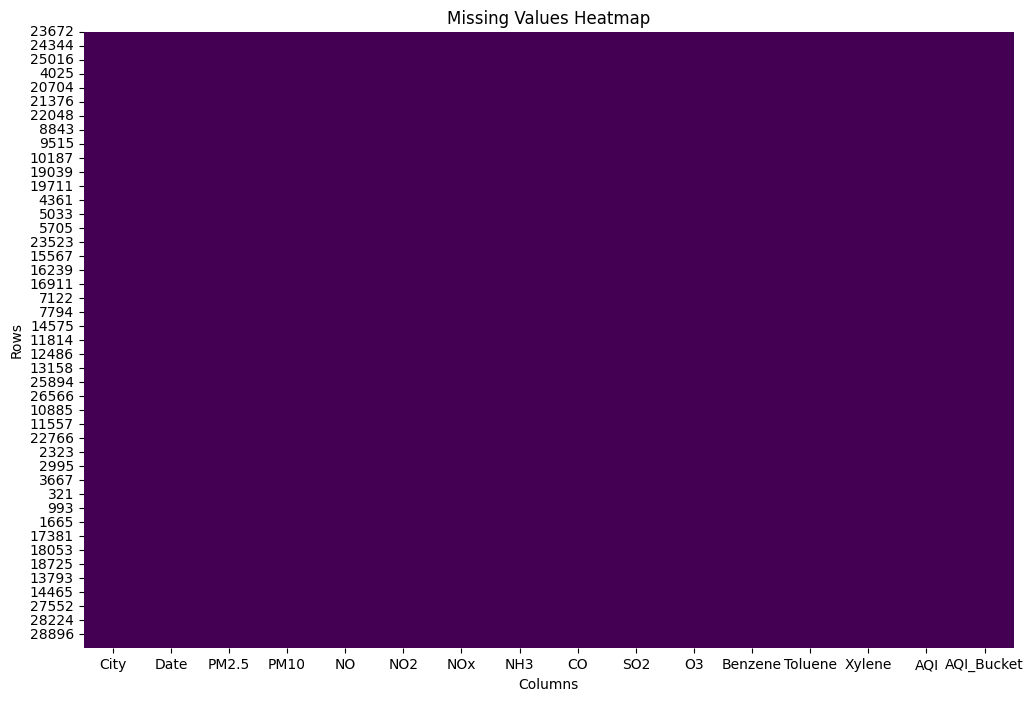

In [108]:
# Visualize the missing values after imputation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [109]:
#saved the cleaned preprocessed dataset
df.to_csv("cleaned_India_air_quality.csv", index=False)
print("\nCleaned dataset saved as cleaned_India_air_quality.csv")


Cleaned dataset saved as cleaned_India_air_quality.csv


In [110]:
#preview of preprocessed dataset
df = pd.read_csv('cleaned_India_air_quality.csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,16.54,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Severe
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,16.54,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Severe
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,16.54,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Severe
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,16.54,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Severe
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,16.54,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [111]:
#Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,29531.0,72.192563,76.191669,0.04,27.03,48.00,86.970,949.99
PM10,29531.0,120.496275,91.277227,0.01,58.53,97.15,150.905,1000.00
NO,29531.0,21.544571,30.682777,0.02,5.92,10.13,21.995,390.68
NO2,29531.0,26.690082,23.811594,0.01,10.45,19.71,35.030,362.21
NOx,29531.0,33.317222,33.586336,0.00,13.70,23.64,39.355,467.63
NH3,29531.0,25.191070,26.490640,0.01,8.71,16.54,36.480,352.89
CO,29531.0,2.292764,6.824258,0.00,0.50,0.91,1.490,175.81
SO2,29531.0,22.531637,39.071277,0.01,5.76,9.67,18.170,193.86
O3,29531.0,33.432386,21.859513,0.01,17.24,29.54,44.215,257.73
Benzene,29531.0,3.218114,15.973597,0.00,0.14,0.98,2.750,455.03


**Inference:**

From the Statistical Summary It shows that PM2.5 and PM10 have highest average concentrations at 72.19 and 120.50. Both exceeds safe limits. The Overall Air Quality Index avearges 166.43 which is unhealthy and with a median of 117, indicating that most measurements reflect poor air quality. Extreme variations are evident with AQI values ranging from 13 to 2049.

**Checking Outliers Using IQR Method.**




In [112]:
numeric_cols = df.select_dtypes(include=[np.number])
outliers_dict ={}
for col in numeric_cols:
  Q1 = np.percentile(df[col], 25)
  Q3 = np.percentile(df[col], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outliers_dict[col] = len(outliers)

outliers_summary = pd.DataFrame.from_dict(outliers_dict, orient='index', columns=['Number of Outliers'])
outliers_summary.sort_values(by='Number of Outliers', ascending=False)

,Number of Outliers
Xylene,5673
SO2,3858
Toluene,3537
NO,3424
CO,3008
NOx,2531
Benzene,2460
PM2.5,2293
PM10,1984
NO2,1426


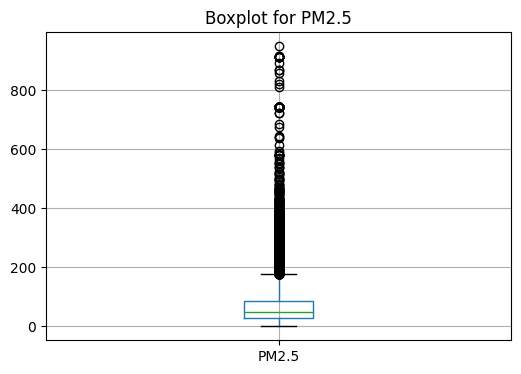

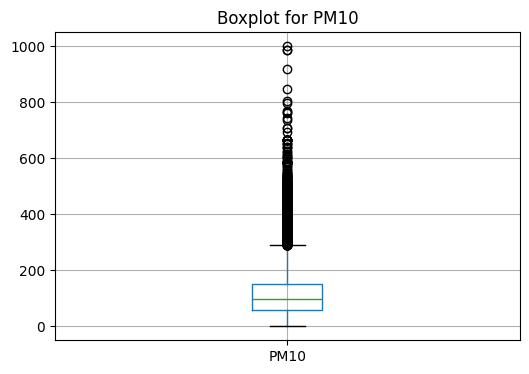

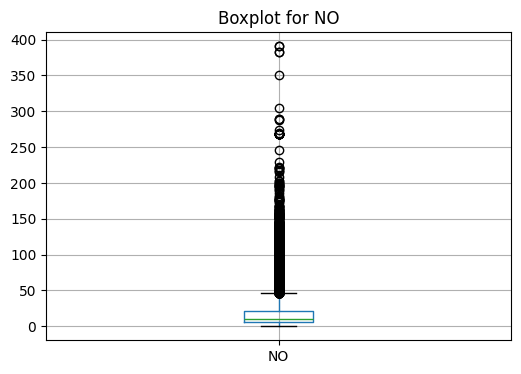

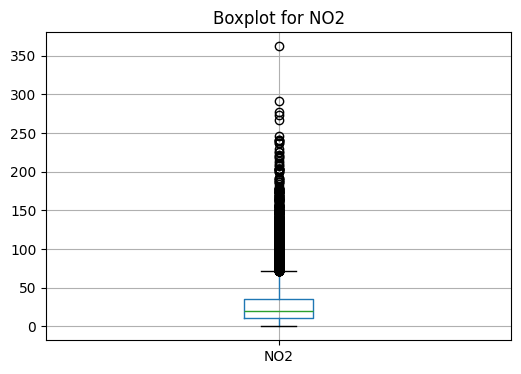

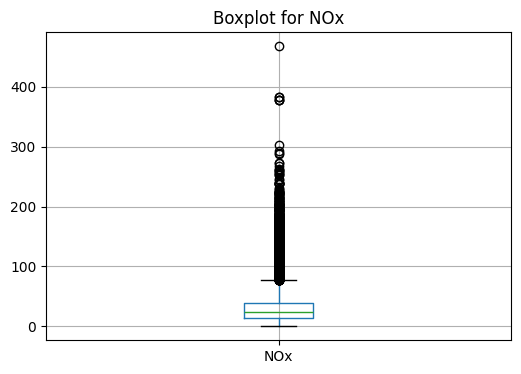

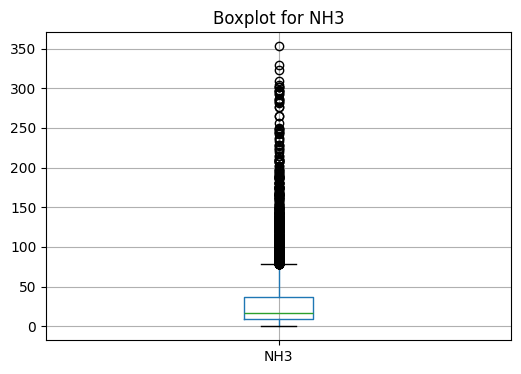

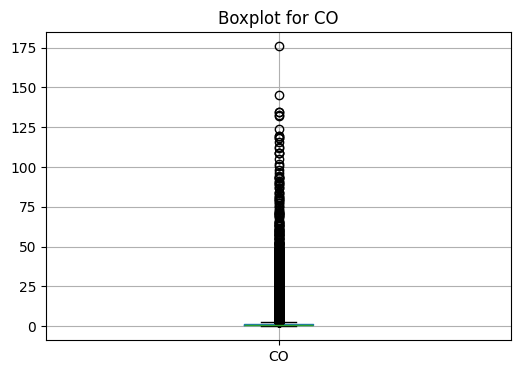

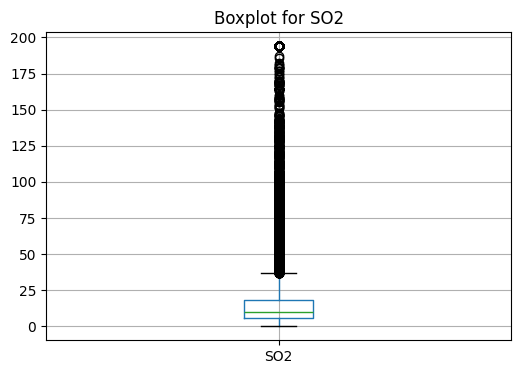

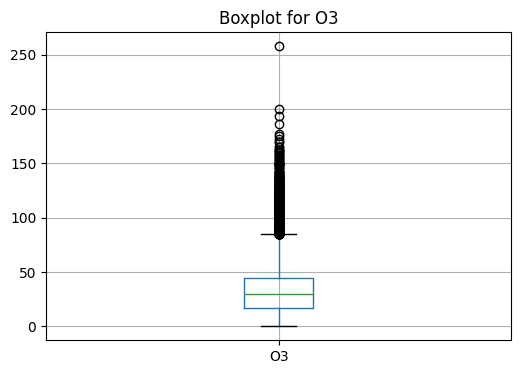

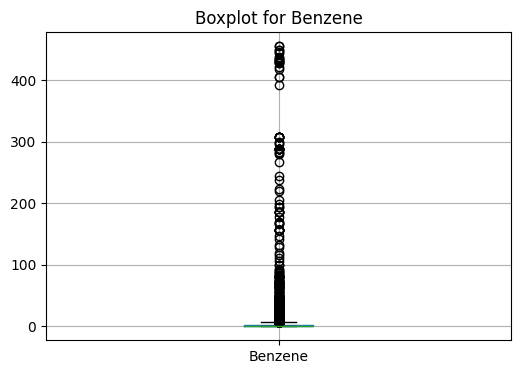

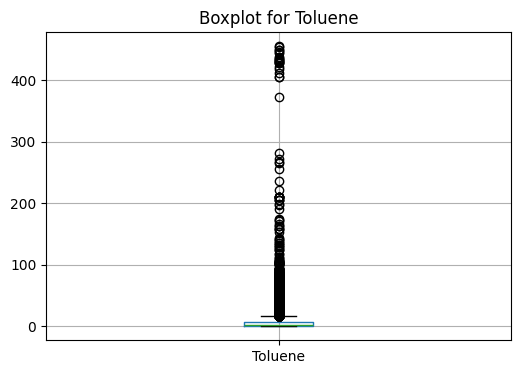

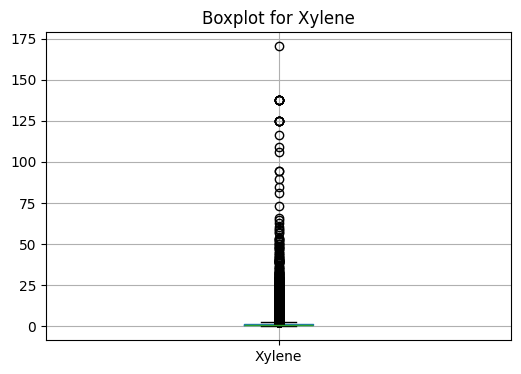

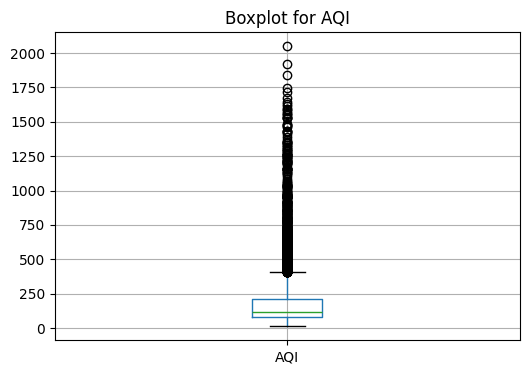

In [113]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


for col in numeric_cols:
  plt.figure(figsize=(6,4))
  df.boxplot(column=col)
  plt.title(f'Boxplot for {col}')
  plt.show()


**Filling Outliers**

In [114]:
for col in numeric_cols:
  df[col] = df[col].astype(float)

  Q1 = np.percentile(df[col], 25)
  Q3 = np.percentile(df[col], 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

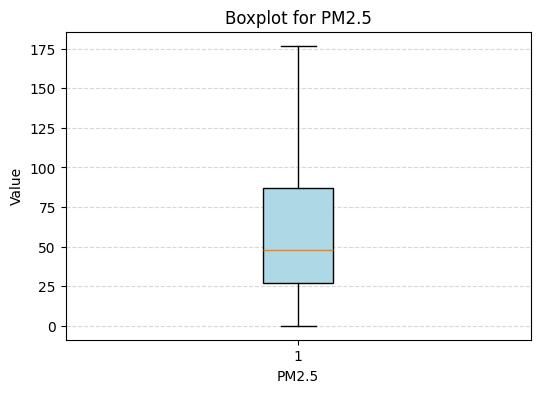

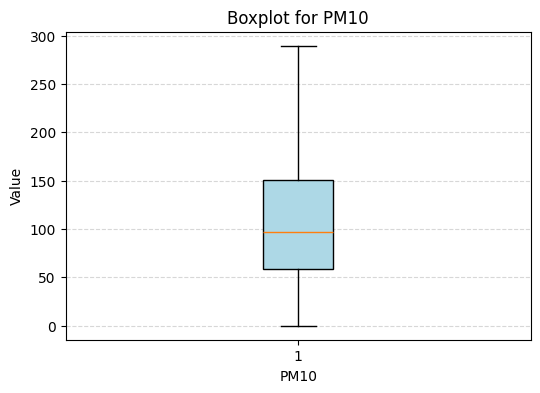

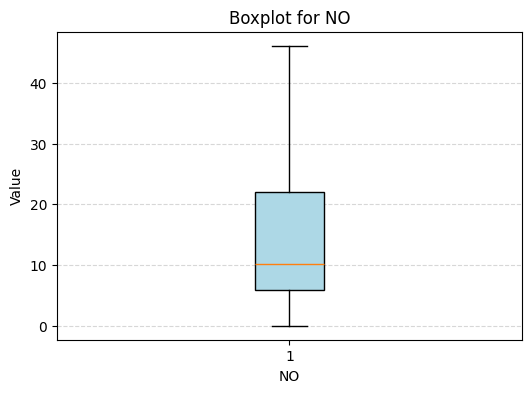

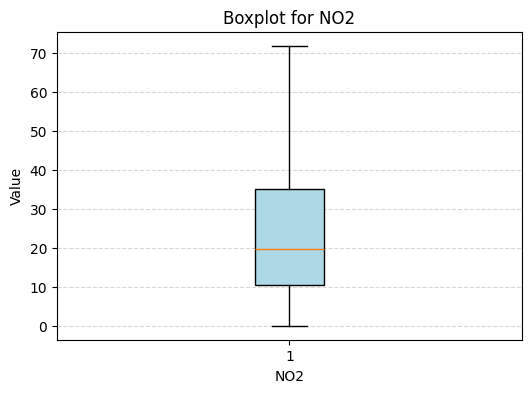

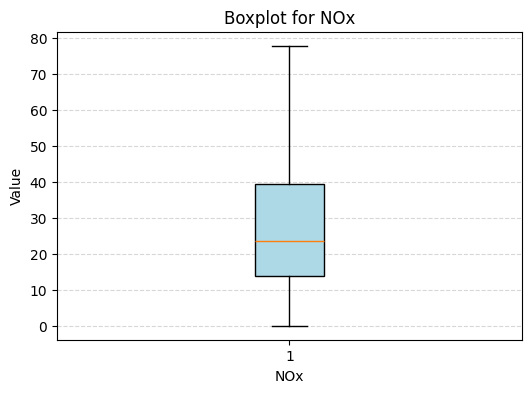

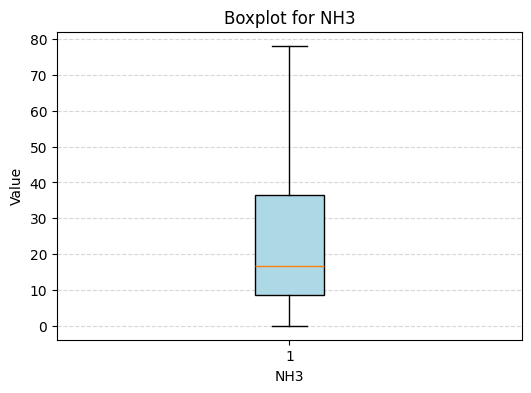

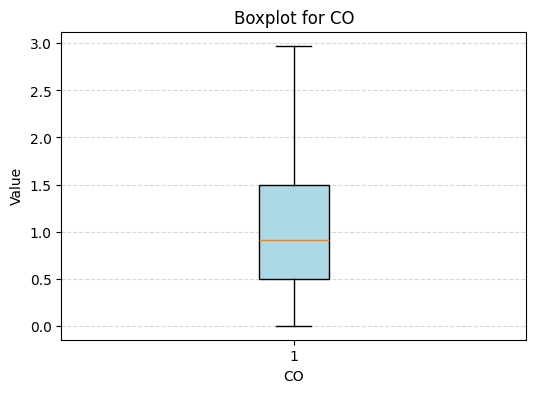

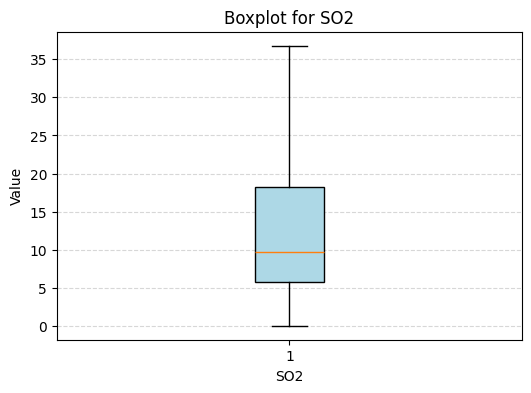

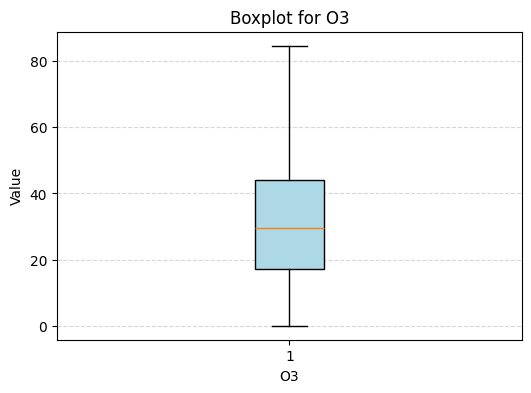

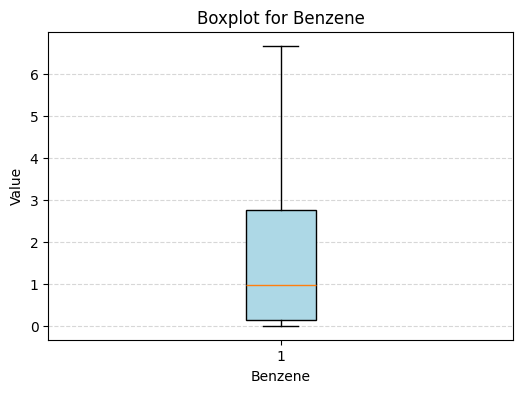

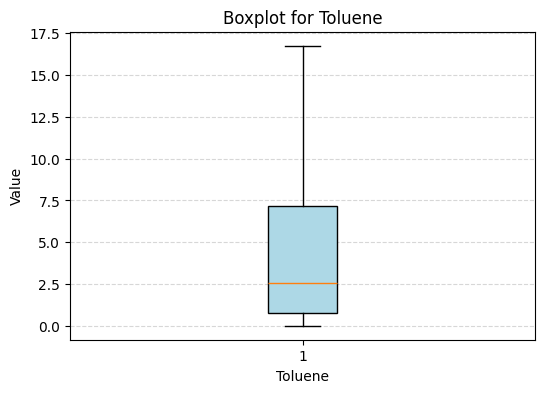

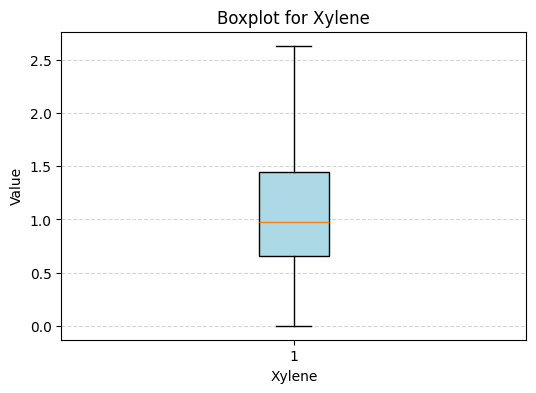

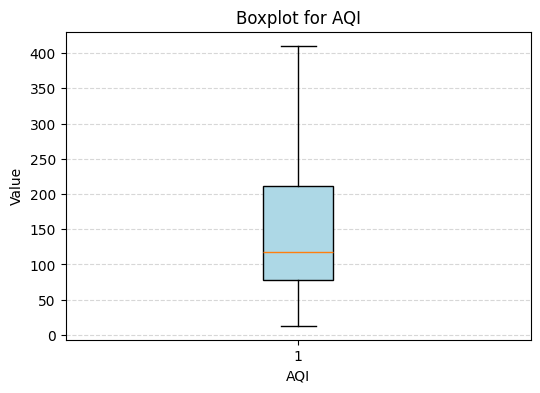

In [115]:
#select only numeric columns from the dataframe
numeric_cols = df.select_dtypes(include=[np.number]).columns


#loop through each numeric column and plotting a boxplot
for col in numeric_cols:
  plt.figure(figsize=(6,4))
  plt.boxplot(df[col], vert=True, patch_artist=True,
              boxprops=dict(facecolor='lightblue'))
  plt.title(f'Boxplot for {col}')
  plt.xlabel(col)
  plt.ylabel('Value')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.show()

**Feature Engineering**

In [146]:
#Converting the Column Date to Date time

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extracting Year, Month, Day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

#extracting Season
def get_season(month):
  if month in [12,1,2]:
     return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  else:
    return 'Autumn'

df['season'] = df['month'].apply(get_season)


#extracting Day of week
df['day_of_week'] = df['Date'].dt.dayofweek
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_map)


df[['Date', 'year', 'month', 'day', 'season', 'day_of_week']].head(5)





,Date,year,month,day,season,day_of_week
0,2015-01-01,2015,1,1,Winter,Thursday
1,2015-01-02,2015,1,2,Winter,Friday
2,2015-01-03,2015,1,3,Winter,Saturday
3,2015-01-04,2015,1,4,Winter,Sunday
4,2015-01-05,2015,1,5,Winter,Monday


**Data Visualization**

**Visualization of Unique List of Pollutants**


In [117]:
import pandas as pd
import plotly.express as px

# Creating a dataframe for pollutants with their type
df_pollutants = pd.DataFrame({
    "Pollutant": ["PM2.5", "PM10", "NO", "NO₂", "NOx", "NH₃", "SO₂", "CO", "O₃", "BTX"],
    "Type": ["Particulate", "Particulate", "Gas", "Gas", "Gas", "Gas", "Gas", "Gas", "Gas", "VOC"],
    "Harmfulness": [10, 7, 6, 8, 8, 5, 6, 6, 7, 9],  # Harmfulness score
    "Description": [
        "Fine particulate matter (most harmful)",
        "Coarse particulate matter",
        "Nitric oxide",
        "Nitrogen dioxide",
        "Total nitrogen oxides (NO + NO₂)",
        "Ammonia",
        "Sulfur dioxide",
        "Carbon monoxide",
        "Ozone",
        "Industrial VOC pollutants"
    ]
})

# Creating the Sunburst chart with two levels of hierarchy
fig_sunburst = px.sunburst(
    df_pollutants,
    path=["Type", "Pollutant"],  # Only two levels: Type and Pollutant
    values="Harmfulness",  # This can be any value you want to represent in the sunburst
    hover_data=["Description"],  # Show the description when hovering over a segment
    color="Harmfulness",  # Color by Harmfulness for visual emphasis
    color_continuous_scale="Viridis",  # Color scale
    title="Pollutants Overview"
)

# Show the chart
fig_sunburst.show()


**List of unique cities in the Dataset**

In [118]:
unique_cities = df['City'].unique()

city_df = pd.DataFrame({'City': unique_cities, 'Count': [1]*len(unique_cities)})

fig =px.pie(
    city_df,
    names='City',
    values='Count',
    color='City',
    title='List of Unique city in Dataset'
)
fig.update_traces(textinfo='label', hovertemplate='%{label}')

fig.show()

**Highlighted Air Quality Monitoring Cities**

In [119]:
import pandas as pd
import plotly.express as px

# City coordinates
city_coords = {
    "Mumbai": (19.0760, 72.8777),
    "Lucknow": (26.8467, 80.9462),
    "Aizawl": (23.7271, 92.7176),
    "Chennai": (13.0827, 80.2707),
    "Chandigarh": (30.7333, 76.7794),
    "Shillong": (25.5788, 91.8933),
    "Gurugram": (28.4595, 77.0266),
    "Bengaluru": (12.9716, 77.5946),
    "Jorapokhar": (23.7519, 86.4146),
    "Hyderabad": (17.3850, 78.4867),
    "Talcher": (20.9517, 85.2335),
    "Guwahati": (26.1445, 91.7362),
    "Delhi": (28.6139, 77.2090),
    "Patna": (25.5941, 85.1376),
    "Brajrajnagar": (21.8167, 83.9167),
    "Bhopal": (23.2599, 77.4126),
    "Amaravati": (16.5417, 80.5150),
    "Amritsar": (31.6340, 74.8723),
    "Kolkata": (22.5726, 88.3639),
    "Ernakulam": (9.9816, 76.2999),
    "Coimbatore": (11.0168, 76.9558),
    "Ahmedabad": (23.0225, 72.5714),
    "Jaipur": (26.9124, 75.7873),
    "Kochi": (9.9312, 76.2673),
    "Thiruvananthapuram": (8.5241, 76.9366),
    "Visakhapatnam": (17.6868, 83.2185),
}

# Create DataFrame
df = pd.DataFrame([
    {"City": city, "Latitude": lat, "Longitude": lon}
    for city, (lat, lon) in city_coords.items()
])

# Create Plotly Geo Scatter Map
fig = px.scatter_geo(
    df,
    lat="Latitude",
    lon="Longitude",
    text="City",
    scope="asia",
    projection="natural earth",
    title="India – Highlighted Air Quality Monitoring Cities",
)

# Styling
fig.update_traces(
    marker=dict(size=10, color="red", symbol="circle"),
    textposition="top center"
)

fig.update_geos(
    fitbounds="locations",
    showcountries=True,
    countrycolor="black",
    showland=True,
    landcolor="lightgray"
)

# Show plot
fig.show()


**Distribution Of Each pollutant**

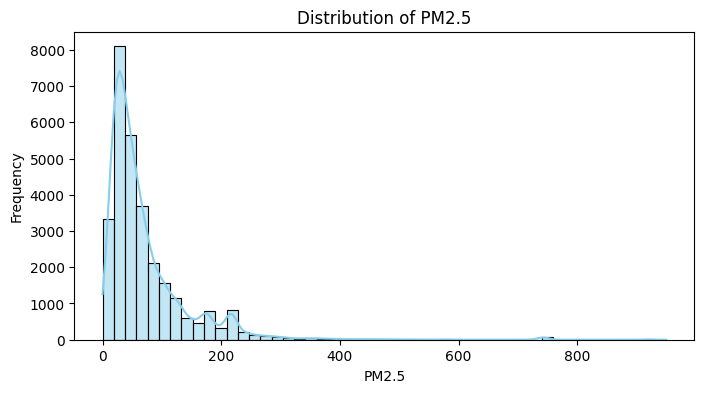

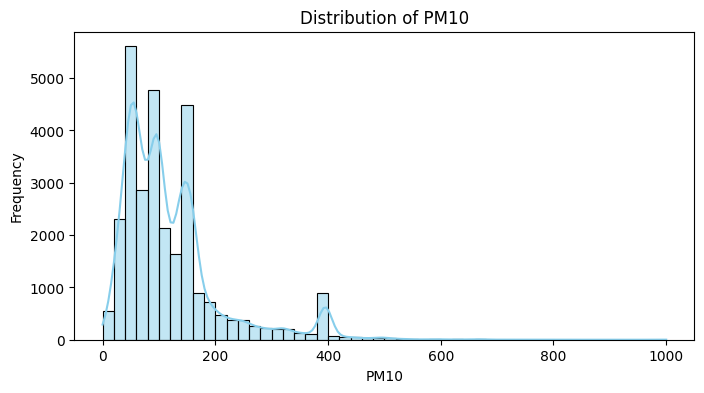

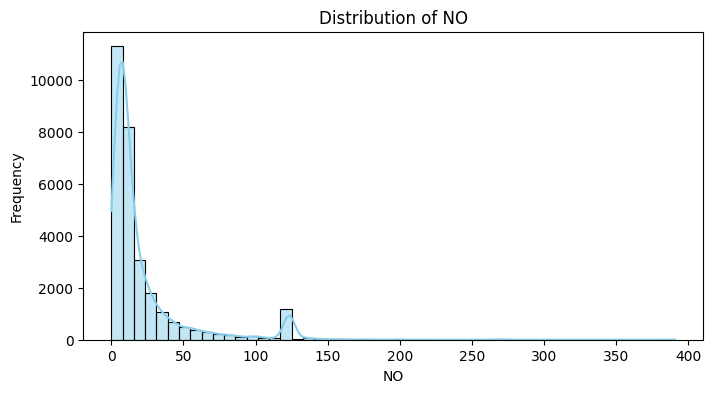

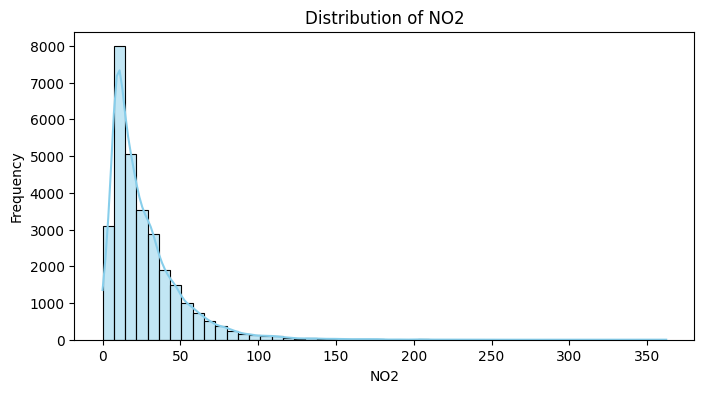

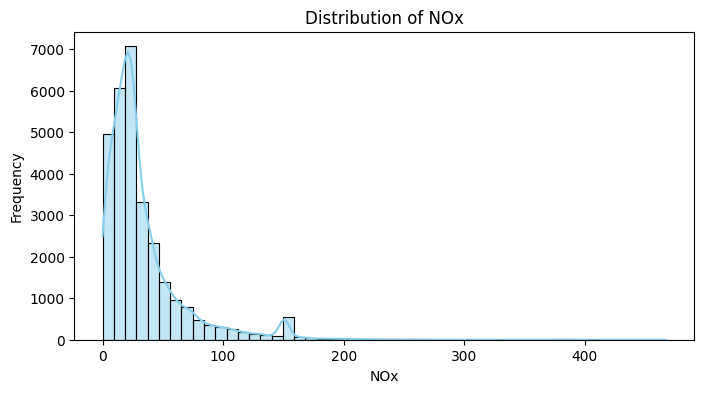

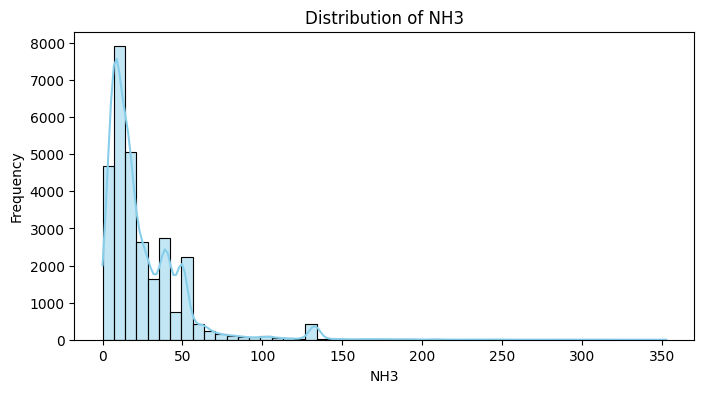

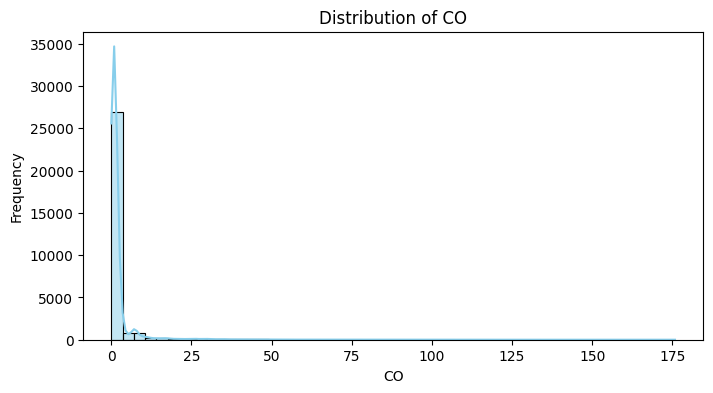

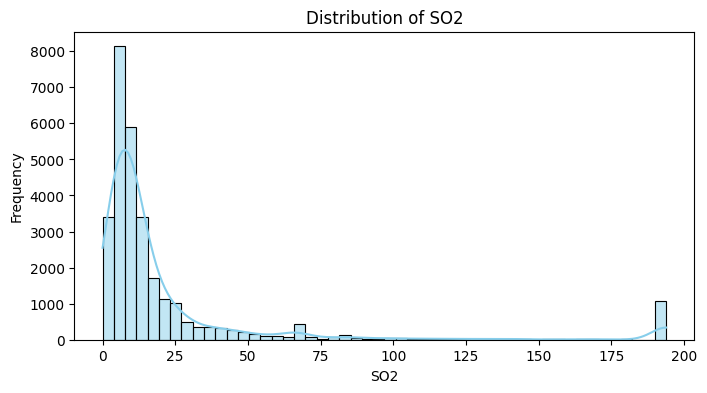

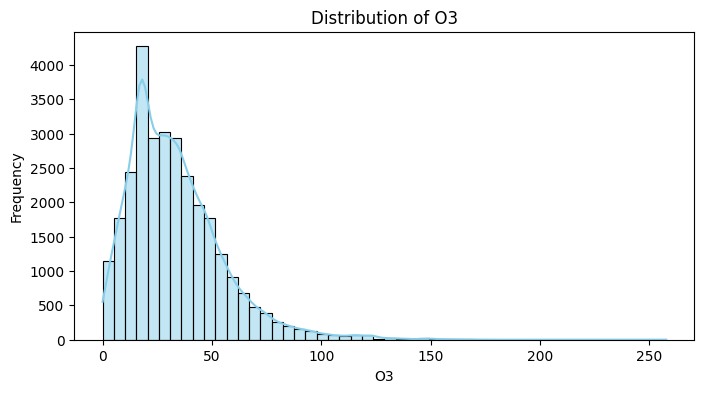

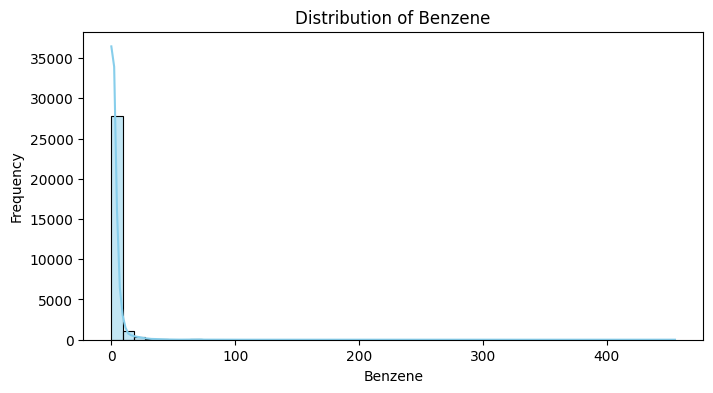

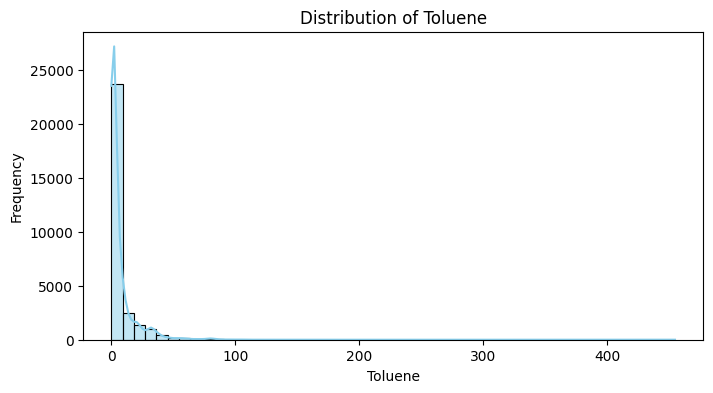

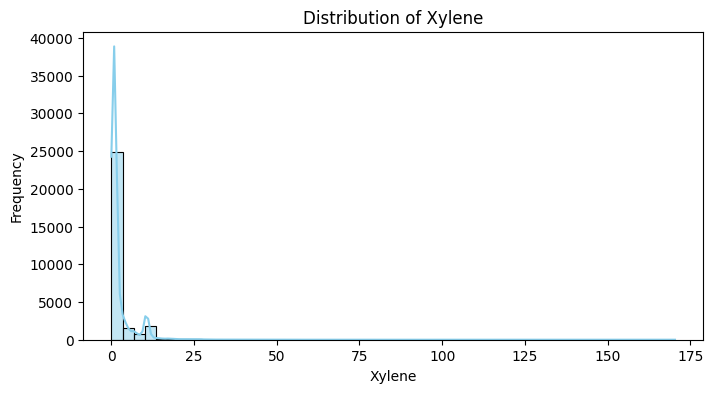

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset FIRST
df = pd.read_csv("cleaned_India_air_quality.csv")

pollutants = [
    'PM2.5', 'PM10', 'NO', 'NO2', 'NOx',
    'NH3', 'CO', 'SO2', 'O3',
    'Benzene', 'Toluene', 'Xylene'
]

for col in pollutants:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), bins=50, kde=True, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()


**Avearge Pollutants by City**

In [121]:
import pandas as pd

# Load dataset
df = pd.read_csv("cleaned_India_air_quality.csv")

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Group by City and calculate mean
city_pollutant_avg = df.groupby('City')[pollutants].mean().reset_index()

# Show the first few rows
print(city_pollutant_avg.head())


        City      PM2.5        PM10         NO        NO2        NOx  \
0  Ahmedabad  92.980224  136.119487  17.946491  47.434689  41.755495   
1     Aizawl  16.850531   23.200973   9.408053   0.388496  12.610354   
2  Amaravati  36.280631   73.642482   5.153544  21.721651  15.252734   
3   Amritsar  53.366896  117.482801  18.703890  18.576798  32.480188   
4  Bengaluru  35.149388   80.882847   9.394052  27.962992  19.687372   

         NH3         CO        SO2         O3    Benzene    Toluene    Xylene  
0  16.540000  17.782997  53.282220  38.936984   5.325326  24.226884  3.832494  
1  22.308938   0.283628   7.378053   3.534336  11.849115  12.254513  0.980000  
2  12.533586   0.600673  14.335258  37.313859   0.692093   2.945825  2.783533  
3  14.284398   0.555897   7.566871  22.536896   3.805225   2.822957  6.364169  
4  24.540567   1.841095   5.512882  33.331239   4.602703   4.690821  0.980000  


In [122]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv("cleaned_India_air_quality.csv")

# List of pollutants
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# Group by City and calculate mean for all pollutants
city_pollutant_avg = df.groupby('City')[pollutants].mean().reset_index()

# Loop through each pollutant and create interactive horizontal bar chart
for pollutant in pollutants:
    fig = px.bar(
        city_pollutant_avg.sort_values(pollutant, ascending=True),
        x=pollutant,
        y='City',
        orientation='h',
        title=f'Average {pollutant} by City',
        color=pollutant,
        color_continuous_scale='Greens',
        labels={pollutant: f'Average {pollutant}', 'City': 'City'}
    )
    fig.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
    fig.show()


**List Of VOC Pollutants**

In [123]:
voc_pollutants = ['Benzene', 'Toluene', 'Xylene']

voc_avg_city = df.groupby('City')[voc_pollutants].mean().reset_index()

#plotting the graph
fig = px.bar(
    voc_avg_city,
    x='City',
    y=voc_pollutants,
    barmode='group',
    title='Avearge VOCs (Benzene toluene Xylene) by City',
    labels={'value': 'Concentration', 'variable':'pollutant'}
)
fig.show()

**Comparsion of PM2.5 vs PM10**

In [124]:
if 'City' in df.columns:
    city_avg = df.groupby('City')[['PM2.5','PM10']].mean().reset_index()

 #interactive plotly grouped barchart
fig = px.bar(
    city_avg,
    x='City',
    y=['PM2.5', 'PM10'],
    barmode='group',
    title='Average PM2.5 vs PM10 by City',
    labels={'value':'Concentraction', 'City':'City', 'variable':'Pollutant'}


)
fig.show()



**Top City per pollutant**

In [125]:
top_cities = {col: df.groupby('City')[col].mean().idxmax() for col in pollutants}
top_cities_df = pd.DataFrame(list(top_cities.items()), columns=['Pollutant', 'Top City'])
print(top_cities_df)

   Pollutant    Top City
0      PM2.5  Jorapokhar
1       PM10    Gurugram
2         NO      Mumbai
3        NO2       Delhi
4        NOx      Mumbai
5        NH3     Chennai
6         CO   Ahmedabad
7        SO2      Mumbai
8         O3      Bhopal
9    Benzene    Shillong
10   Toluene    Shillong
11    Xylene    Gurugram


**Most Polluted City**

In [150]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

#average pollutant concentraction per city
city_avg = df.groupby('City')[pollutants].mean()

city_avg['Total_Pollution'] = city_avg.sum(axis=1)

#most polluted city by total score
most_polluted_city = city_avg['Total_Pollution'].idxmax()
most_pollution_value = city_avg.loc[most_polluted_city, 'Total_Pollution']

print(f"Most polluted city (by total pollutants): {most_polluted_city} - {most_pollution_value:.2f}")

fig = px.bar(
     city_avg.reset_index(),
     x='City',
     y='Total_Pollution',
     color_continuous_scale='Reds',
     title='Total Pollution Score by City'
)

fig.update_traces(marker_color=['darkred' if city==most_polluted_city else 'orange' for city in  city_avg.index])

fig.show()


Most polluted city (by total pollutants): Delhi - 631.88


**Seasonal Trend Of Pollutants**

In [149]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

#Avearge Per season
season_avg = df.groupby('season')[pollutants].mean().reset_index()
season_avg

,season,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,Autumn,76.124296,122.545322,23.935670,29.563563,37.621386,25.960389,2.551995,23.490571,32.512729,2.966030,7.634446,2.867036
1,Spring,62.033848,112.955398,19.548844,23.844159,28.808662,23.411215,1.852470,22.158286,37.649383,3.484537,6.745519,2.162930
2,Summer,46.316806,96.472009,16.055855,20.214765,25.275409,22.579237,2.034992,20.198938,26.459708,2.184582,6.155906,2.191785
3,Winter,104.958380,150.243708,26.928831,33.541681,42.253292,29.004938,2.799876,24.343110,36.295091,4.144466,8.926315,2.353757


In [153]:
season_long = season_avg.melt(id_vars='season', value_vars=pollutants,
                              var_name='pollutant', value_name='Concentration')

#grouped bar chart
fig = px.bar(
    season_long,
    x='season',
    y='Concentration',
    color='pollutant',
    barmode='group',
    title='Seasonal Trend of Pollutants'
)
fig.show()

**Which Season is most polluted**

In [148]:
#Aveage AQI per season
season_aqi = df.groupby('season')['AQI'].mean().reset_index()

#checking the most polluted season
most_polluted_season = season_aqi.loc[season_aqi['AQI'].idxmax()]

fig = px.bar(
    season_aqi,
    x='season',
    y='AQI',
    color='AQI',
    color_continuous_scale='Reds',
    title='Average AQi by Season'
 )

#highlightling the most polluted season
top_season = most_polluted_season['season']
fig.update_traces(marker_color=['darkred' if season==top_season else 'orange' for season in season_aqi['season']])

fig.show()

**Yeary Trends of pollutants(2015-2020)**

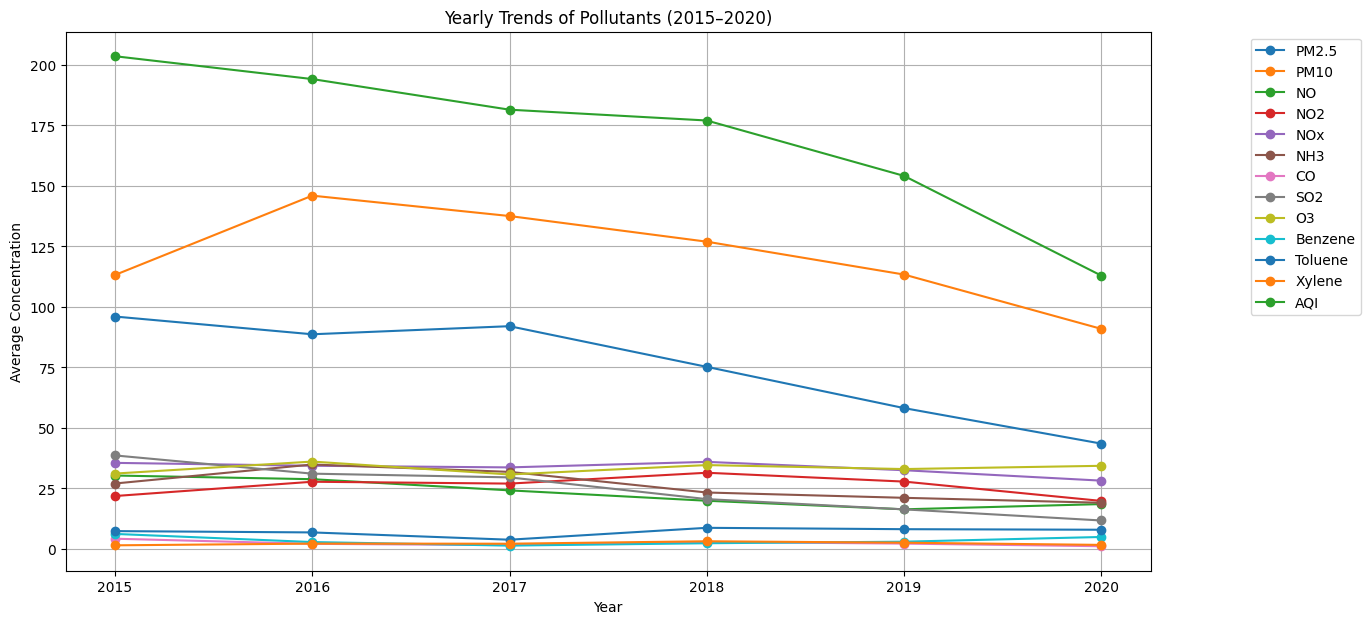

In [141]:
plt.figure(figsize=(14, 7))
for col in pollutants:
    yearly_trends[col].plot(marker='o', label=col)

plt.title('Yearly Trends of Pollutants (2015–2020)')
plt.xlabel('Year')
plt.ylabel('Average Concentration')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

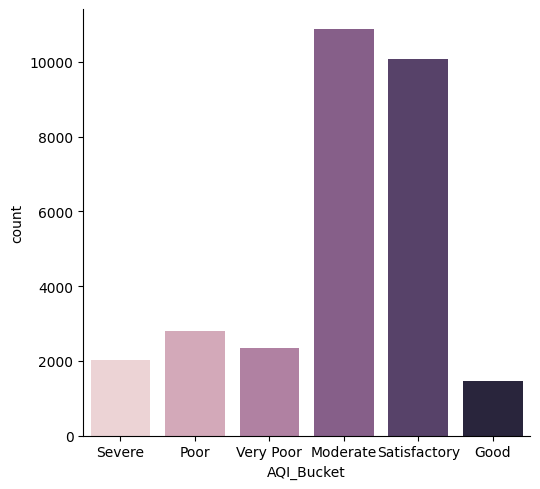

In [133]:
import warnings
warnings.filterwarnings('ignore')

sns.catplot(x = "AQI_Bucket", kind= "count", palette = "ch: 2.87", height=5, aspect=1.1, data = df)


In [134]:
fig = px.pie(df, names='AQI_Bucket',
             title='Percentage Share of AQI Categories',
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()


**AQI Year Trend Analysis**

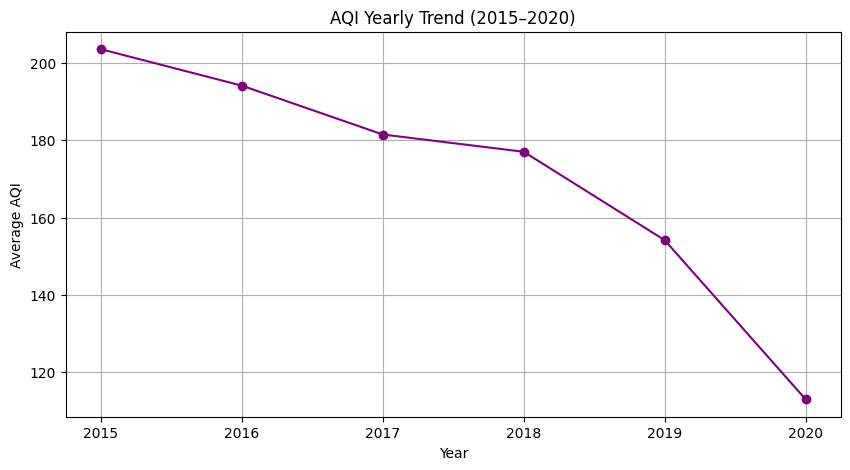

In [140]:
df['Year'] = df['Date'].dt.year
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']
yearly_trends = df.groupby('Year')[pollutants].mean()
yearly_trends
plt.figure(figsize=(10, 5))
yearly_trends['AQI'].plot(marker='o', color='purple')
plt.title('AQI Yearly Trend (2015–2020)')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()


**Correlation Analysis**

In [136]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx','NH3','CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

#computing correlations among pollutans and AQI
corr_matrix = df[pollutants + ['AQI']].corr()
corr_matrix

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.498658,0.120367,0.240802,0.183836,0.140598,0.111807,0.060630,0.120583,0.010049,0.090004,0.098251,0.614239
PM10,0.498658,1.000000,0.149250,0.296485,0.239514,0.146489,0.071980,-0.026186,0.162142,-0.001809,0.130979,0.223764,0.494044
NO,0.120367,0.149250,1.000000,0.213326,0.713234,0.002461,0.100750,0.605644,-0.075368,-0.009644,0.032903,-0.027742,0.177574
NO2,0.240802,0.296485,0.213326,1.000000,0.461734,0.128722,0.354264,0.018743,0.305208,0.038672,0.298399,0.136395,0.499983
NOx,0.183836,0.239514,0.713234,0.461734,1.000000,0.023794,0.180590,0.373766,0.041930,0.017869,0.125595,0.016509,0.306533
NH3,0.140598,0.146489,0.002461,0.128722,0.023794,1.000000,-0.042110,-0.164721,0.092886,-0.014213,0.027983,0.059236,0.113440
CO,0.111807,0.071980,0.100750,0.354264,0.180590,-0.042110,1.000000,0.168364,0.053895,0.065710,0.284095,0.124382,0.654298
SO2,0.060630,-0.026186,0.605644,0.018743,0.373766,-0.164721,0.168364,1.000000,-0.054624,-0.028019,0.030776,-0.022854,0.120693
O3,0.120583,0.162142,-0.075368,0.305208,0.041930,0.092886,0.053895,-0.054624,1.000000,0.032466,0.154897,0.099869,0.200639
Benzene,0.010049,-0.001809,-0.009644,0.038672,0.017869,-0.014213,0.065710,-0.028019,0.032466,1.000000,0.631440,0.064054,0.041456


**Visualization using Heatmap**


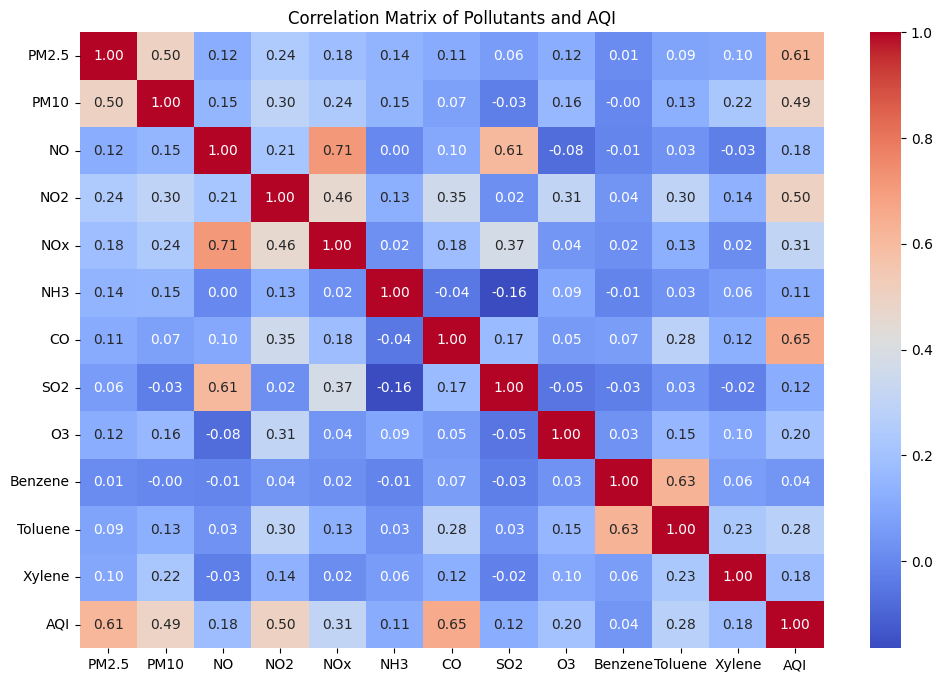

In [137]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Pollutants and AQI')
plt.show()


**Summary**

1. Overall air quality distribution
2. Most and Least polluted cities
3. Seasonal Variation
4. Days in each AQI Category
5. Contribution of each pollutants
6. Time trends

**Model building**

In [152]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# -----------------------------
# Loding the Data set
# -----------------------------
df = pd.read_csv("cleaned_India_air_quality.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek

# -----------------------------
# Features & Target
# -----------------------------
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3',
            'year','month','day_of_week','City']
X = df[features]
y = df['AQI']

# -----------------------------
# Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Preprocessing (One-Hot Encode City)
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('city', OneHotEncoder(handle_unknown='ignore'), ['City'])
    ],
    remainder='passthrough'
)

# -----------------------------
# RandomForest Pipeline
# -----------------------------
rf = RandomForestRegressor(
    n_estimators=100,       # fewer trees = faster
    max_depth=20,           # limit depth for speed
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

# -----------------------------
# Train Model
# -----------------------------
pipeline.fit(X_train, y_train)
print("✅ Model trained successfully!")

# -----------------------------
# Evaluate Model
# -----------------------------
y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# -----------------------------
# Save Model
# -----------------------------
#joblib.dump(pipeline, "models/aqi_model.pkl")
#print("✅ Model saved as 'models/aqi_model.pkl'")


✅ Model trained successfully!
RMSE: 40.29
MAE: 19.16
R²: 0.91


**GitHub project repository layout screenshot**

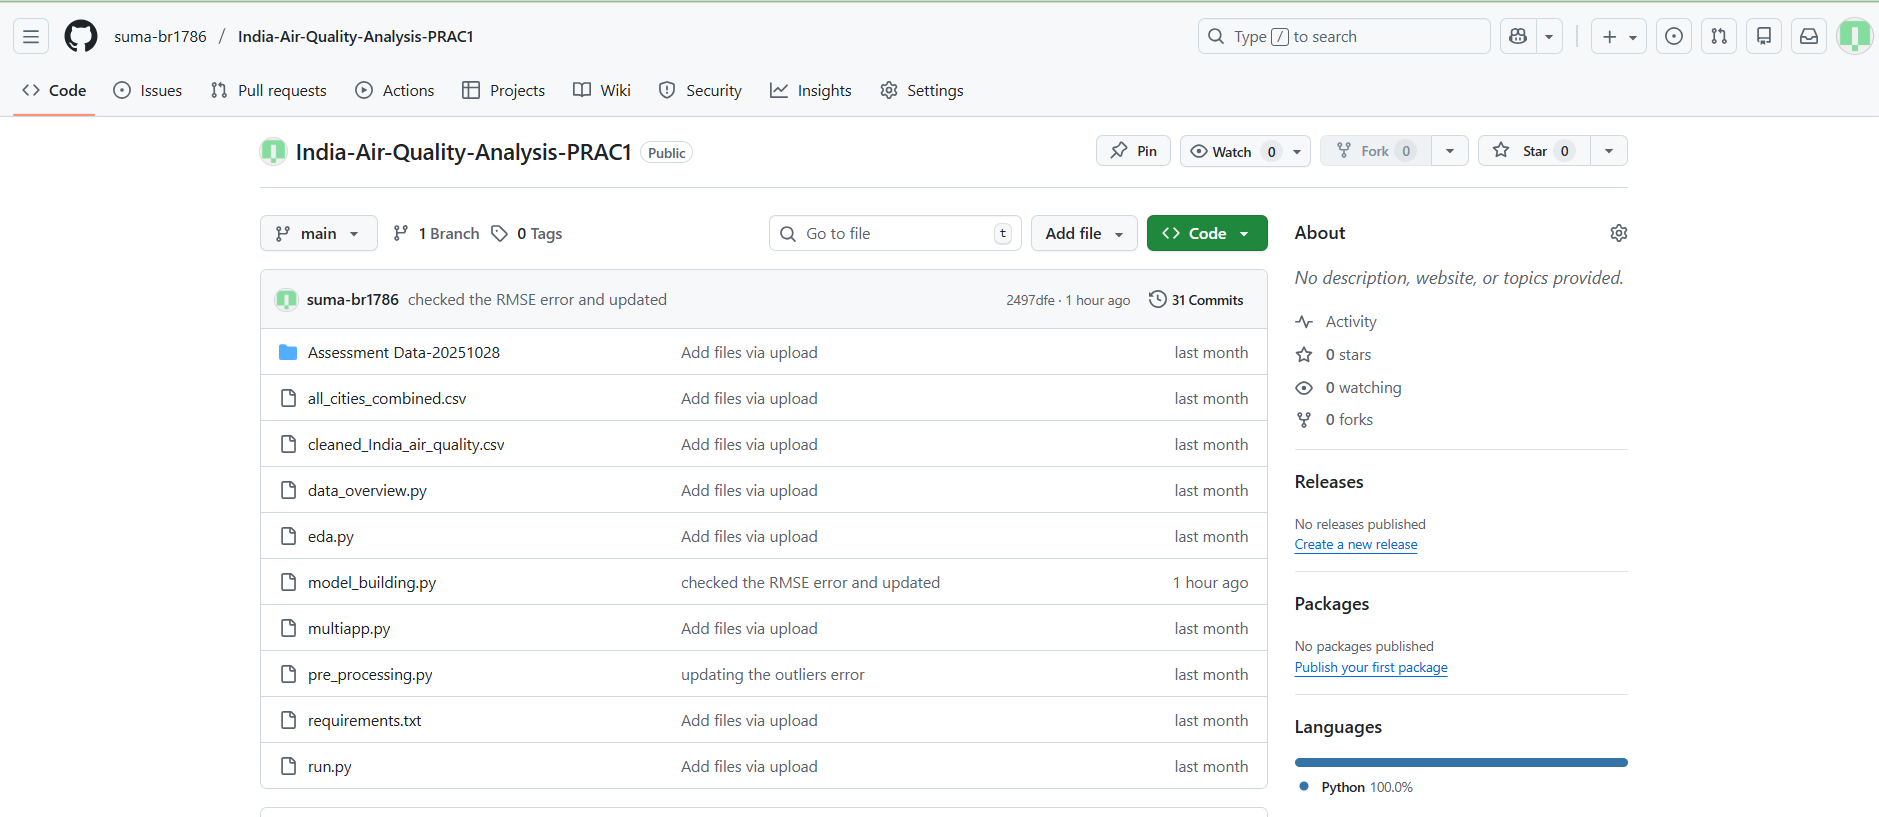

**Commit History Screenshot**

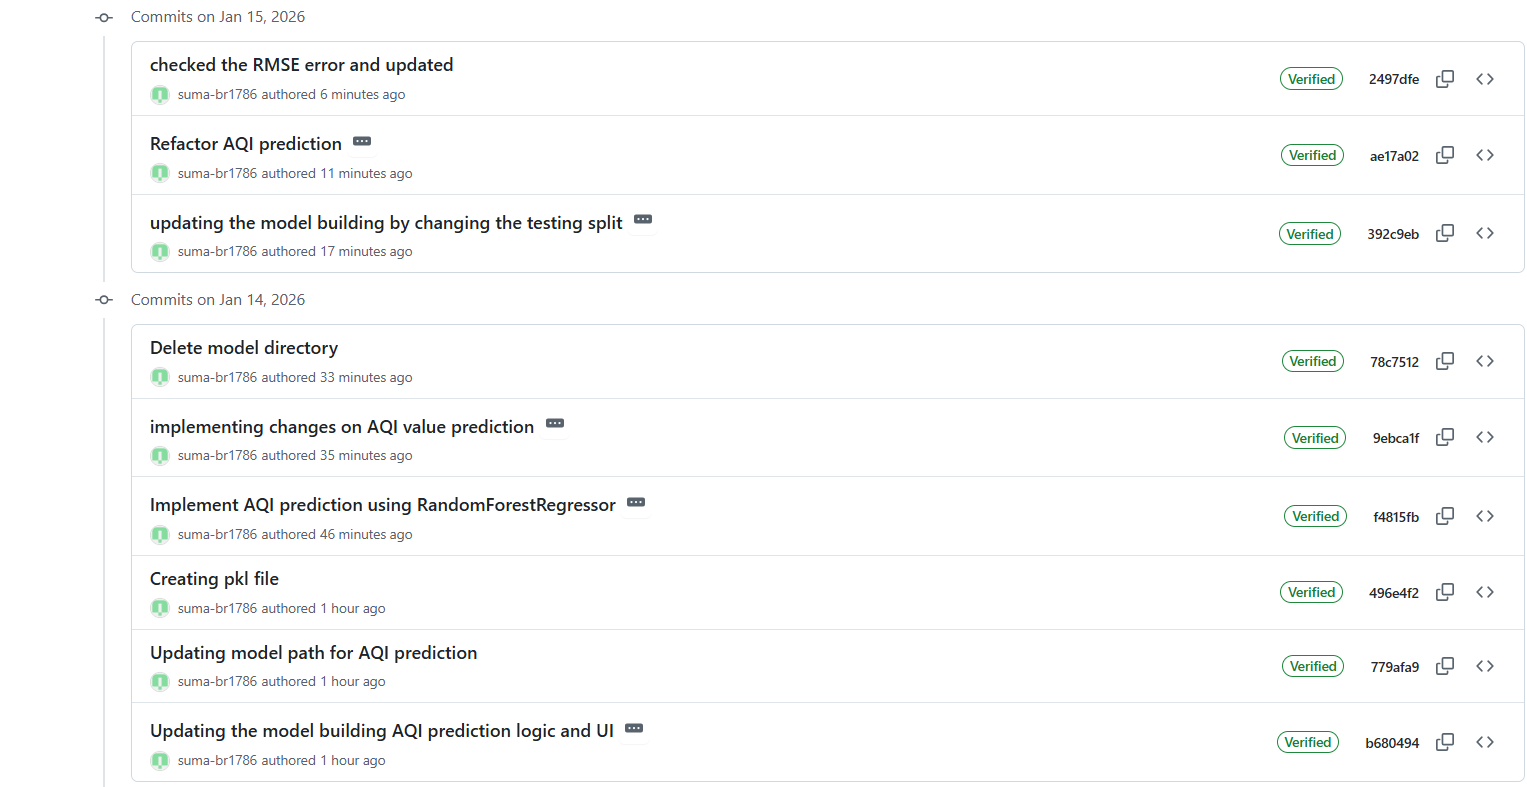

**Streamlitapp Link**

https://india-air-quality-analysis-prac1-c4ngze4wvja6yuwgtcbph2.streamlit.app/